In [1]:
import sys
sys.path.append('..') #to add top-level to path

import pickle
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from modules.project_helper import FuturesCloseData, VolFeatures, TweetReturnsFeatures, TradeModel, MarketFeatures
import matplotlib.pyplot as plt
#import graphviz

### Response Variable (One Day Log-Returns)

In [2]:
fc = FuturesCloseData()
fc.single_log_returns('ES').head()

date
2014-01-02   -0.000570
2014-01-03   -0.002710
2014-01-06    0.005697
2014-01-07    0.000994
2014-01-08    0.000284
Name: ES, dtype: float64

### 1) Tweet topics

In [3]:
topics = pd.read_csv('../data/features/topic_features_clusters=25.csv').set_index('date')
topics.columns = ["topic_"+column for column in topics.columns.tolist()]

In [4]:
topics.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-02,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-03,0.0,0.222222,0.0,0.111111,0.222222,0.000000,0.0,0.0,0.111111,0.0,...,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,0.0,0.214286,0.0,0.214286,0.142857,0.000000,0.0,0.0,0.000000,0.0,...,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,0.0,0.000000,0.0,0.000000,0.333333,0.166667,0.0,0.0,0.000000,0.0,...,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2) TF-IDF (First Two Components) Features

In [5]:
svd_df_daily = pd.read_csv('../data/features/combined_svd_df.csv',names=['index','svd_1','svd_2','date'], index_col = 0, skiprows = 1)
svd_df_daily.set_index('date', inplace = True)
svd_df_daily.index = pd.to_datetime(svd_df_daily.index)
svd_df_daily.head()

,svd_1,svd_2
date,,
2009-05-05,0.229959,0.195915
2009-05-08,0.052085,0.062540
2009-05-09,0.079564,0.035554
2009-05-12,0.101352,0.043649
2009-05-13,0.068212,0.062037


### 3) Trump Tweet Returns Features

In [6]:
tr = TweetReturnsFeatures()
tr.features('ES').head()

,ES_min_tweet,ES_max_tweet,ES_daily_tweet
date,,,
2017-02-01,0.001327,0.003084,0.000107
2017-02-02,0.000208,0.004080,0.000087
2017-02-03,0.001417,0.005195,0.000137
2017-02-06,0.001328,0.003935,0.000134
2017-02-07,0.001821,0.004572,0.000142


In [7]:
tr.features('ES').dtypes

ES_min_tweet      float64
ES_max_tweet      float64
ES_daily_tweet    float64
dtype: object

### 4) Futures Market Features

In [8]:
market = pd.read_csv('../data/features/market_features.csv')
market = MarketFeatures()
market.features('ES').head()

,ES_volume_chg,ES_opening_down,ES_opening_unch,ES_opening_up
date,,,,
2015-11-16,-2.869230,0,0,1
2015-11-17,-2.553725,0,0,1
2015-11-18,-5.156960,1,0,0
2015-11-19,13.056758,1,0,0
2015-11-20,-8.501065,0,0,1


### 5) S&P500 Intraday Features

In [9]:
intraday = pd.read_csv('../data/features/intra_sp_features.csv')
intraday.set_index('date', inplace = True)
intraday.index = pd.to_datetime(intraday.index)
intraday.head()

,intra_ret_1,intra_ret_5,intra_ret_15,intra_diff_15_5,intra_blend
date,,,,,
2016-11-14,-0.000343,-0.000343,-0.000343,-0.000343,-0.000343
2016-11-15,-0.000114,-0.000571,-0.001141,0.000114,-0.000418
2016-11-16,-0.000457,-0.000228,-0.000800,-0.000228,-0.000304
2016-11-17,0.000908,0.000908,0.000908,0.000908,0.000908
2016-11-18,-0.000114,-0.000114,-0.000114,-0.000114,-0.000114


### 6) Volatility Curve Features

In [10]:
vol = VolFeatures()
vol.features('ES').head()

,ES_1M_atm_vol,ES_1M_RR25,ES_1M_Fly25,ES_2M_RR25,ES_2M_Fly25,ES_2M_1M_atm_vol
Date,,,,,,
2016-11-14,0.125167,-0.046660,0.004511,-0.054350,0.005055,0.005187
2016-11-15,0.115973,-0.037389,0.004496,-0.047791,0.005024,0.004549
2016-11-16,0.117994,-0.039737,0.004298,-0.050144,0.004259,0.005215
2016-11-17,0.114572,-0.037683,0.003737,-0.047440,0.004492,0.005008
2016-11-18,0.110470,-0.037870,0.002963,-0.049350,0.004098,0.006858


### 7) Agricultural Gamma Features

In [11]:
corn_gamma = pd.read_csv('../data/features/corn_gamma_features.csv')
corn_gamma.set_index('date', inplace = True)
corn_gamma.index = pd.to_datetime(corn_gamma.index)
corn_gamma.head()

,C_up_gamma_5,C_down_gamma_5,C_up_diff_5,C_down_diff_5
date,,,,
2016-09-21,53219.375632,53384.321274,11268.575199,11471.420535
2016-09-22,52737.562141,54080.579964,11594.644211,11644.373967
2016-09-27,56031.645597,37727.193425,12965.800732,7437.719089
2016-09-29,56912.627474,39498.507310,13003.249796,8306.498080
2016-09-30,56946.454785,40410.808361,12994.168946,8664.380661


In [12]:
wheat_gamma = pd.read_csv('../data/features/wheat_gamma_features.csv')
wheat_gamma.set_index('date', inplace = True)
wheat_gamma.index = pd.to_datetime(wheat_gamma.index)
wheat_gamma.head()

,W_up_gamma,W_up_gamma_5,W_down_gamma,W_down_gamma_5,W_up_diff_5,W_down_diff_5
date,,,,,,
2016-09-27,8576.259502,11281.695503,4087.655527,5119.843342,2705.436002,1032.187814
2016-09-29,8748.940729,11350.174510,4969.158554,6931.755883,2601.233781,1962.597329
2016-10-04,8552.079396,11245.962151,4946.619967,6619.575422,2693.882756,1672.955456
2016-10-11,11749.633867,14704.655914,6785.699250,9338.077715,2955.022047,2552.378465
2016-10-13,14455.289259,18393.989866,5898.948724,8111.147772,3938.700607,2212.199049


In [13]:
soybeans_gamma = pd.read_csv('../data/features/soybeans_gamma_features.csv')
soybeans_gamma.set_index('date', inplace = True)
soybeans_gamma.index = pd.to_datetime(soybeans_gamma.index)
soybeans_gamma.head()

,S_up_gamma,S_up_gamma_5,S_down_gamma,S_down_gamma_5,S_up_diff_5,S_down_diff_5
date,,,,,,
2016-09-21,21281.915584,34465.710071,22955.429051,39120.529046,13183.794488,16165.099994
2016-09-22,24363.409183,37548.504509,23053.560905,38822.637529,13185.095326,15769.076624
2016-09-23,16074.574468,29833.167794,22494.594642,39086.796216,13758.593327,16592.201574
2016-09-26,23478.993484,39720.842812,19206.103056,33082.313487,16241.849329,13876.210431
2016-09-27,22043.827780,38721.781147,21561.613475,34020.341945,16677.953367,12458.728470


### 7) Agricultural Gamma Features

In [14]:
sentiment_features = pd.read_csv("../data/features/daily_sentiment.csv")
sentiment_features = sentiment_features.set_index('date')
sentiment_features.head()

,negative_proportion_min,negative_proportion_max,negative_proportion_mean,positive_proportion_min,positive_proportion_max,positive_proportion_mean,neutral_proportion_min,neutral_proportion_max,neutral_proportion_mean,combined_score_min,combined_score_max,combined_score_mean
date,,,,,,,,,,,,
2009-05-05,0.000,0.000,0.000,0.163,0.252,0.2075,0.748,0.837,0.7925,0.4767,0.7506,0.61365
2009-05-08,0.000,0.000,0.000,0.277,0.277,0.2770,0.723,0.723,0.7230,0.6115,0.6115,0.61150
2009-05-09,0.000,0.000,0.000,0.000,0.000,0.0000,1.000,1.000,1.0000,0.0000,0.0000,0.00000
2009-05-12,0.000,0.000,0.000,0.000,0.000,0.0000,1.000,1.000,1.0000,0.0000,0.0000,0.00000
2009-05-13,0.075,0.075,0.075,0.222,0.222,0.2220,0.703,0.703,0.7030,0.4809,0.4809,0.48090


# Combine All Features

In [18]:
instrument_list = ['ES', 'NQ', 'CD', 'EC', 'JY', 'MP', 'TY', 'US', 'C', 'S', 'W', 'CL', 'GC']
start_date = pd.to_datetime('2017-02-01')
end_date = pd.to_datetime('2019-11-07')
full_features ={}

for inst in instrument_list:

    date_filter = fc.single_log_returns(inst,1,2).index[(fc.single_log_returns(inst,1,2).index >= start_date) & 
                                                (fc.single_log_returns(inst,1,2).index <= end_date)]

    full_features[inst] = pd.DataFrame(fc.single_log_returns(inst,1,2).loc[date_filter])\
                            .join(tr.features(inst))

    full_features[inst] = full_features[inst].fillna(full_features[inst].mean())
    full_features[inst] = full_features[inst]\
                            .join(vol.features(inst))\
                            .join(topics)\
                            .join(svd_df_daily)\
                            .fillna(0)\
                            .join(market.features(inst))\
                            .join(intraday)\
                            .fillna(0)\
                            .join(sentiment_features)\
                            .fillna(0)

    if inst=='C':
         full_features[inst] = full_features[inst]\
                                .join(corn_gamma)\
                                .fillna(method='ffill')
    if inst=='W':
             full_features[inst] = full_features[inst]\
                                    .join(wheat_gamma)\
                                    .fillna(method='ffill')
    if inst=='S':
         full_features[inst] = full_features[inst]\
                                .join(soybeans_gamma)\
                                .fillna(method='ffill')

    


#vol.features(inst).loc[features_index].join(fc.returns(inst).loc[features_index])import pickle
filehandler = open("../data/features/full_features.pkl","wb")
pickle.dump(full_features,filehandler)   
filehandler.close()

X_dict

In [16]:
# instrument_list = ['ES', 'NQ', 'CD', 'EC', 'JY', 'MP', 'TY', 'US', 'C', 'S', 'W', 'CL', 'GC']
# strat_sharpes = {}
# strat_rets = {}
# strat_cum_rets = {}
# strat_models = {}
# for inst in instrument_list:
#     y = 2 * (y_dict[inst]>= 0) - 1
#     X_train, X_test, y_train, y_test = train_test_split(X_dict[inst], y, test_size=0.50, shuffle=False )
#     tm = TradeModel(n_estimators=1000, max_features=10, max_depth=15, criterion ='entropy')
#     tm.fit(X_train, y_train)
#     strat_models[inst] = tm
#     strat_rets[inst], strat_cum_rets[inst] = tm.strategy_returns(X_test, y_dict[inst][-len(X_test):], cutoff=0.55)
#     strat_sharpes[inst] = tm.sharpe(X_test, y_dict[inst][-len(X_test):],cutoff=0.55)
#     print('{} sharpe {}:'.format(inst, strat_sharpes[inst]))
    

NameError: name 'strat_cum_rets' is not defined

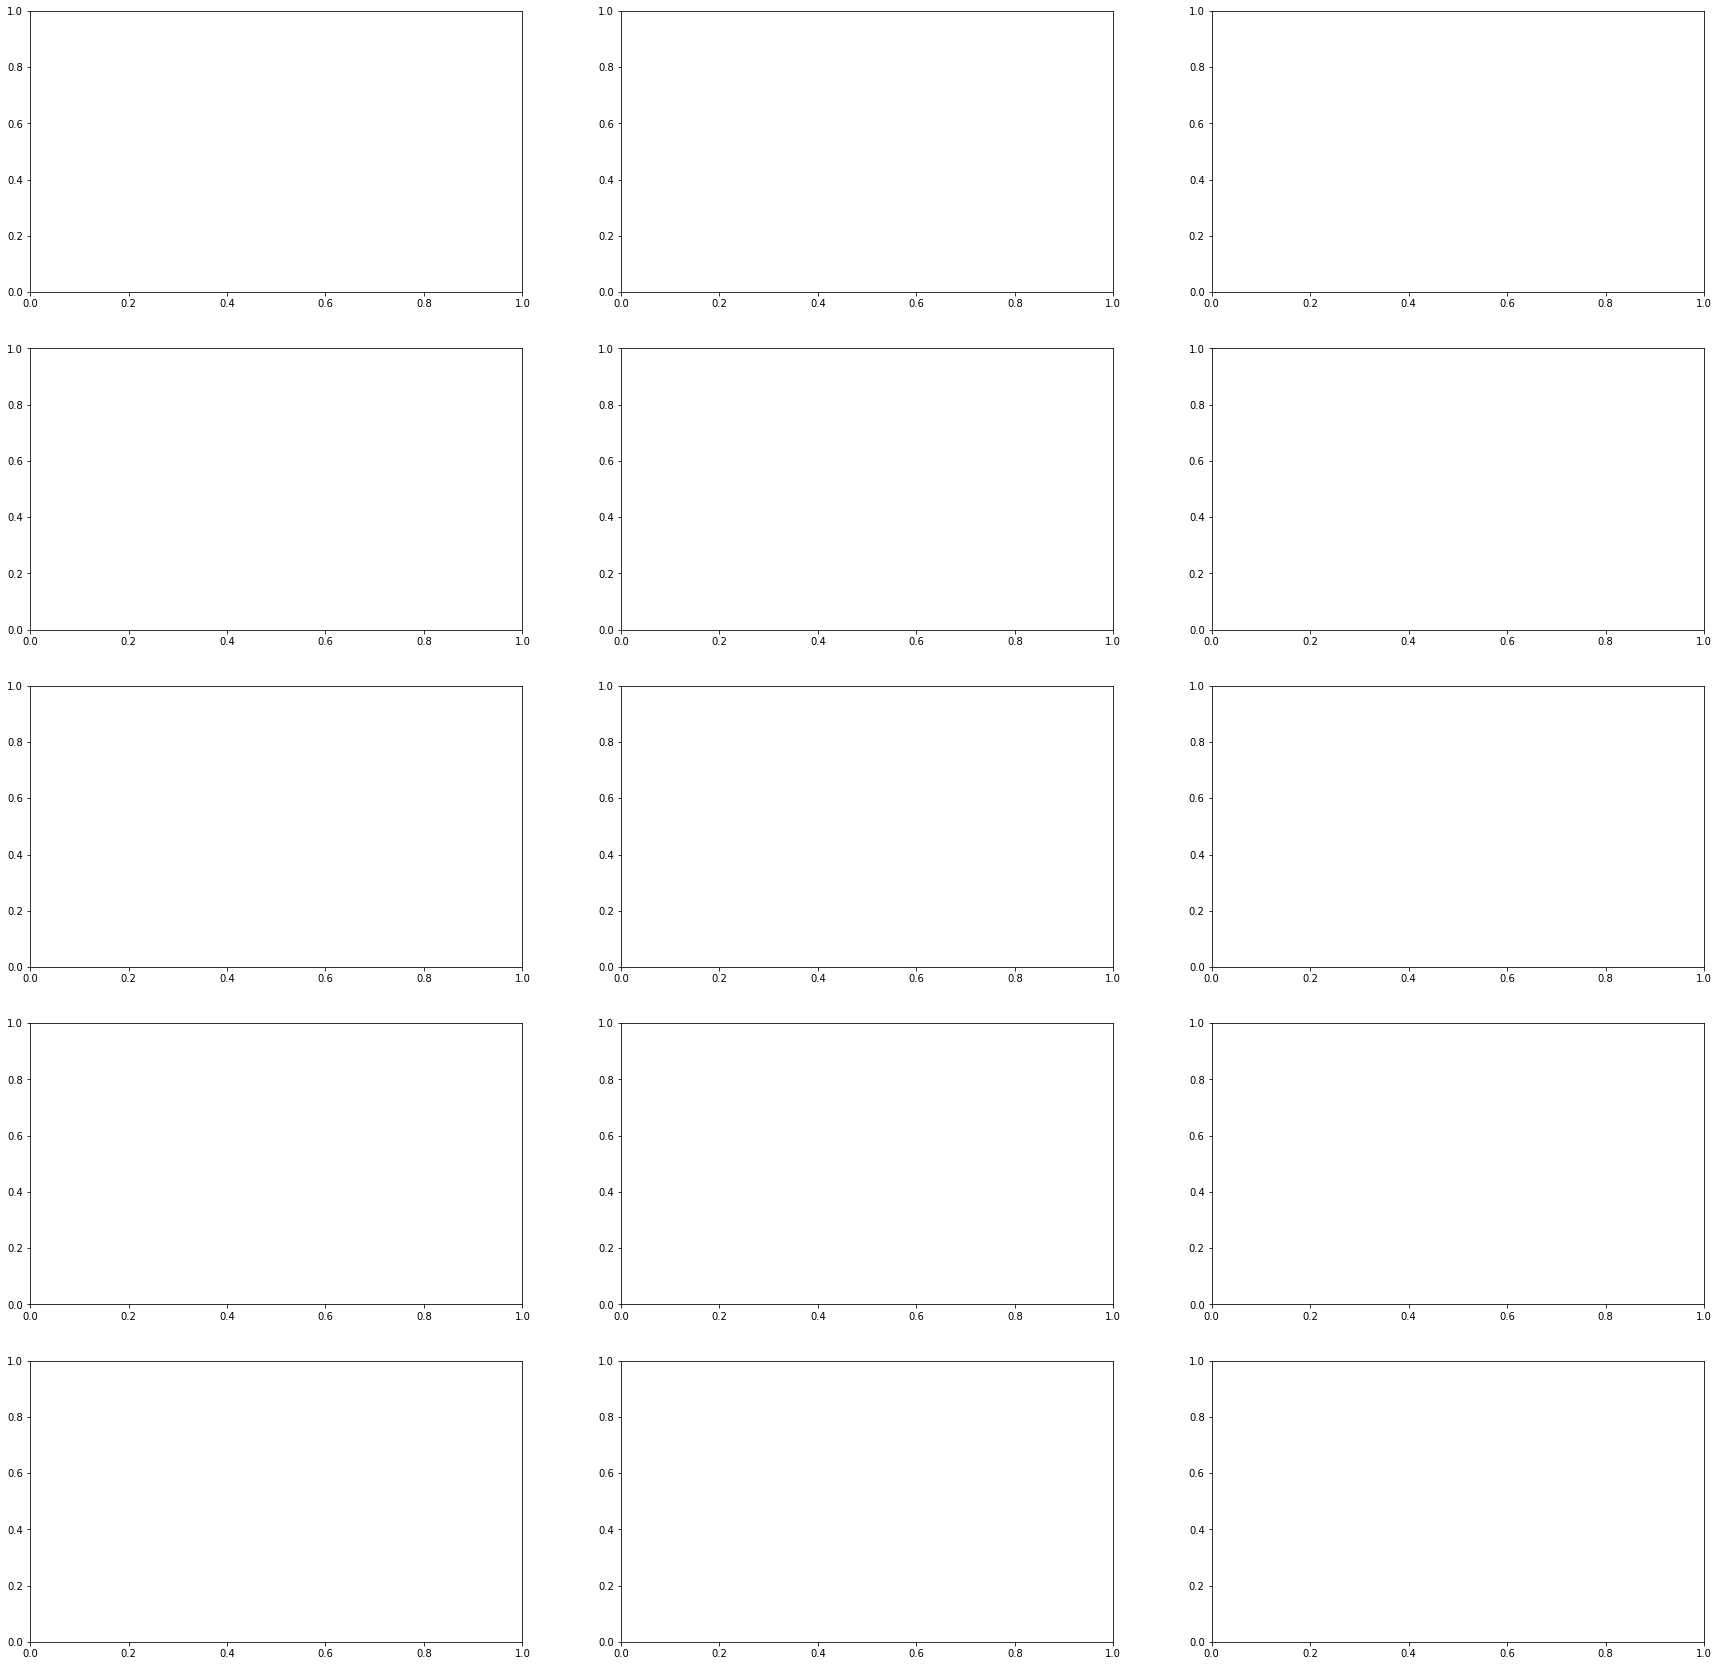

In [17]:
fig, ax = plt.subplots(5,3,figsize=(30,30))
ax = ax.ravel()
for i, inst in enumerate(instrument_list):
    ax[i].plot(strat_cum_rets[inst])
    ax[i].set_title(inst)


In [ ]:
port_rets = pd.DataFrame(strat_rets).mean(axis=1)
plt.plot((1 + pd.DataFrame(strat_rets).mean(axis=1)).cumprod())
print(port_rets.mean()/port_rets.std())

In [ ]:
strat_models['NQ'].model.feature_importances_

In [ ]:
strat_sharpes

In [ ]:
'''
dot_data = export_graphviz(tree, out_file=None, 
                      feature_names=X_train.columns,  
                     class_names=[str(1),str(-1)],  
                     filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
'''

In [ ]:
from pandas.plotting import scatter_matrix
mat = pd.DataFrame(y_dict['ES']).join(X_dict['ES'])
mat = mat.rename(columns = {'ES':'Y', 'ret':'intraday_ret'})
axs = scatter_matrix(mat,figsize=(12, 12), diagonal='kde');
n = len(mat.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50